# <center>Trabajo práctico N°3</center>

Un método implícito para resolver la ecuación del calor dada por $u_t = u_{xx} + f(x,t)$, para $x \in [0, 1]$ y $t \in [0, t_F]$

In [1]:
using LinearAlgebra
using Plots

In [2]:
"""
   explicit_heat

Explicit method to solve a heat equation.
# Arguments

    - `Δt::Float`: time differential step size.

    - `N::Integer`: total number of time iterations.

    - `M::Integer`: total number of nodes for `(0, 1)`.

    - `α::Int or Float`: left-side Dirichlet condition.

    - `β::Int or Float`: right-side Dirichlet condition.

    - `U0::Function`: scalar function representing an initial solution.

    - `f::Function`: Right-hand side function for the method.
# Returns

    `U::Array{Float64}`: 2D array with succesive solutions for the equation.

"""
function explicit_heat(Δt, N, M, α, β, U0, f)
    Δx = 1 / (M+1)
    r = Δt / (Δx^2)
    nodes = [i*Δx for i in 0:M+1]
    U = Array{Float64}(undef, N+1, M+2)
    U[1, :] .= U0.(nodes)
    U[:, 1] .= α
    U[:, M+2] .= β
    for n in 1:N
        for j in 2:M+1
            U[n+1, j]= r * U[n, j-1] + (1-2*r) * U[n,j] + r * U[n,j+1] + (Δt * f)
        end
    end
    return U
end

explicit_heat

In [3]:
"""
   implicit_heat

Implicit method to solve a heat equation.
# Arguments

    - `Δt::Float`: time differential step size.

    - `N::Integer`: total number of time iterations.

    - `M::Integer`: total number of nodes for `(0, 1)`.

    - `α::Int or Float`: left-side Dirichlet condition.

    - `β::Int or Float`: right-side Dirichlet condition.

    - `U0::Function`: scalar function representing an initial solution.

    - `f::Function`: Right-hand side function for the method.
# Returns

    `U::Array{Float64}`: 2D array with succesive solutions for the equation.

"""
function implicit_heat(Δt, N, M, α, β, U0, f)
    Δx = 1 / (M+1)
    r = Δt / (Δx^2)
    nodes = [i*Δx for i in 0:M+1]

    U = Array{Float64}(undef, N+1, M+2)
    U[1, :] .= U0.(nodes)
    U[:, 1] .= α
    U[:, M+2] .= β

    diagonal = ones(M + 2) * (1 + 2r)
    diagonal_aux = ones(M + 1) * (-r)
    matrix = Tridiagonal(diagonal_aux, diagonal, diagonal_aux)
    lu_m = lu(matrix)

    for i in 1:N
        U[i+1, :] .= lu_m \ U[i, :]
    end
    return U
end

implicit_heat

In [4]:
function tent(x)
    rv = 0
    if 0 <= x <= 0.5
        rv = x
    elseif 0.5 < x <= 1
        rv = 1 - x
    end
    return rv
end

tent (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /home/puff/git-repos/numerico/entregas/imp_heat_sol.gif
└ @ Plots /home/puff/.julia/packages/Plots/HcxwM/src/animation.jl:114


Plots.AnimatedGif("/home/puff/git-repos/numerico/entregas/imp_heat_sol.gif")
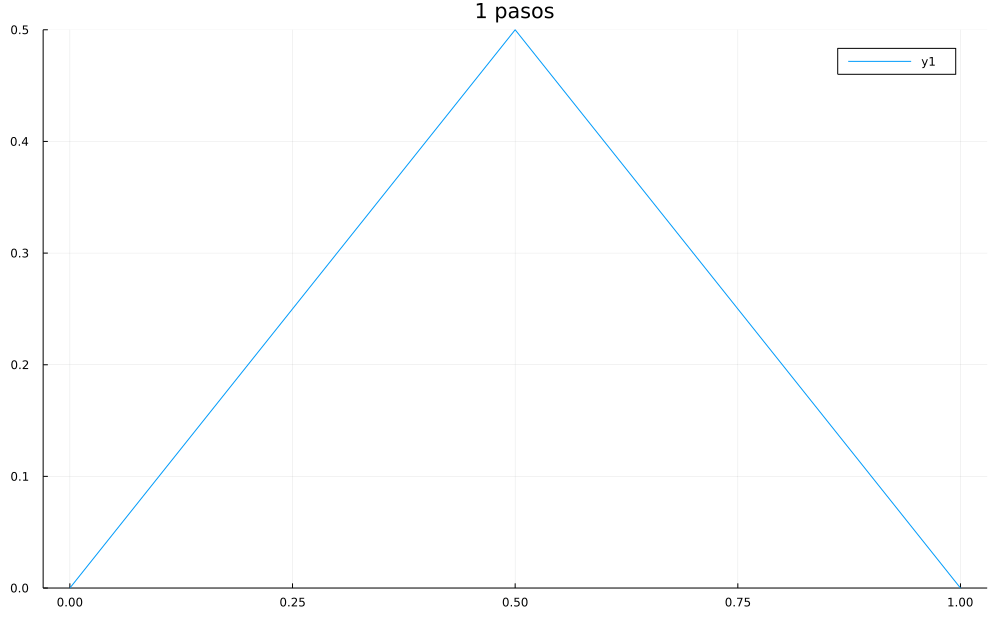

In [15]:
result = implicit_heat(0.05, 40, 19, 0, 0, tent, 0)
Δx=0.05
dom = [j*Δx for j in 0:20]
anim = @animate for i in 1:40
    plot(dom, result[i, :], ylims=(0, 0.5), title="$i pasos", size=(999, 618))
end
gif(anim, "imp_heat_sol.gif", fps = 15)

In [6]:
exp_sol = explicit_heat(0.001, 2000, 19, 0, 0, tent, 0)
imp_sol = implicit_heat(0.001, 2000, 19, 0, 0, tent, 0);

x = [j*0.05 for j in 0:20]
plot(x, [exp_sol[2000, :], imp_sol[2000, :]], label=["Explicit" "Implicit"], size=(999, 618))

In [13]:
@time begin
    print("Método explícito:")
    _ = explicit_heat(0.001, 2000, 19, 0, 0, tent, 0);
end

Método explícito:  0.000236 seconds (22 allocations: 329.000 KiB)


2001×21 Matrix{Float64}:
 0.0  0.05         0.1          0.15         …  0.1          0.05         0.0
 0.0  0.05         0.1          0.15            0.1          0.05         0.0
 0.0  0.05         0.1          0.15            0.1          0.05         0.0
 0.0  0.05         0.1          0.15            0.1          0.05         0.0
 0.0  0.05         0.1          0.15            0.1          0.05         0.0
 0.0  0.05         0.1          0.15         …  0.1          0.05         0.0
 0.0  0.05         0.1          0.15            0.1          0.05         0.0
 0.0  0.05         0.1          0.15            0.1          0.05         0.0
 0.0  0.05         0.1          0.149934        0.1          0.05         0.0
 0.0  0.05         0.0999738    0.14983         0.0999738    0.05         0.0
 0.0  0.0499895    0.0999266    0.149641     …  0.0999266    0.0499895    0.0
 0.0  0.0499685    0.0998375    0.149389        0.0998375    0.0499685    0.0
 0.0  0.0499287    0.0997106    0.14905

In [14]:
@time begin
    print("Método implícito:")
    _ = implicit_heat(0.001, 2000, 19, 0, 0, tent, 0);
end

Método implícito:  0.000921 seconds (4.03 k allocations: 1.300 MiB)


2001×21 Matrix{Float64}:
 0.0         0.05        0.1         …  0.1         0.05        0.0
 0.0117218   0.0527479   0.100644       0.100644    0.0527479   0.0117218
 0.0189912   0.0561561   0.101841       0.101841    0.0561561   0.0189912
 0.0237615   0.0594486   0.103367       0.103367    0.0594486   0.0237615
 0.0270634   0.0623814   0.105031       0.105031    0.0623814   0.0270634
 0.0294609   0.0649157   0.106706    …  0.106706    0.0649157   0.0294609
 0.0312748   0.0670844   0.108316       0.108316    0.0670844   0.0312748
 0.0326946   0.0689385   0.109818       0.109818    0.0689385   0.0326946
 0.0338366   0.0705281   0.111194       0.111194    0.0705281   0.0338366
 0.0347749   0.0718957   0.112436       0.112436    0.0718957   0.0347749
 0.0355585   0.0730759   0.113544    …  0.113544    0.0730759   0.0355585
 0.0362205   0.0740962   0.114522       0.114522    0.0740962   0.0362205
 0.0367843   0.074978    0.115376       0.115376    0.074978    0.0367843
 ⋮                 